In [4]:
import pandas as pd
import numpy as np

# Lecture des données

In [6]:
PROJECT_PATH = "C:/Users/Utilisateur/Desktop/Projet_interpromo_2k22/ProjectInterPromo"

In [7]:
DATA_PATH = PROJECT_PATH + "/data"


In [10]:
df = pd.read_csv(r"C:\Users\Utilisateur\Desktop\Projet_interpromo_2k22\ProjectInterPromo\data\Donnees_v0_NAN_remplaces.csv")

In [11]:
df[0:10]

,Unnamed: 0,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,0,8312v5IodTRgOR8/FWWjGEwsg==,0,0,0,fìPÅæ,SECTEUR CENTRE,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,NF,0.0,Très peu actifs,toulouse
1,1,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
2,2,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
3,3,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
4,4,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
5,5,8316U9AkRrt1X0jnjjhpZ+BQg==,0,0,0,j9od0,SECTEUR EST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,...,14.0,12.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
6,6,831zjexj9jRTr9livs8gCH7Hg==,0,0,0,ÏRReo,SECTEUR SUD,MAIL_NEUTRE,TEL_NEUTRE,POR_OPTIN,...,250.0,240.0,0.0,0.0,0.0,0.0,FI,1.0,actifs trad ss rdv,toulouse
7,7,831MHo/3Q2pSDBK40twzyqnAQ==,0,0,0,4åBep,SECTEUR NORD,MAIL_NEUTRE,TEL_OPTIN,POR_OPTIN,...,8.0,8.0,0.0,0.0,0.0,0.0,FI,1.0,actifs trad ss rdv,toulouse
8,8,8315aYVoYbewXCrLvHqk02Xtg==,0,0,0,PMBÉJ,SECTEUR SUD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTIN,...,6.0,6.0,0.0,0.0,0.0,0.0,QF,0.0,sans contact,toulouse
9,9,831DDPQVFSTv/8iXhBIa3YoxQ==,0,0,0,ÂhcOÆ,SECTEUR SUD,MAIL_NEUTRE,TEL_OPTOUT,POR_OPTOUT,...,2.0,2.0,0.0,0.0,0.0,0.0,QF,1.0,Digital Web,toulouse


In [12]:
df_null = df.isnull().sum()/len(df)*100

In [13]:
df_null[df_null > 60]

Series([], dtype: float64)

# Repésentation des données

## ACP

In [13]:
quali_col = []
for i, name in zip(df.dtypes, df.columns):
    if i == "object":
        quali_col.append(name)

print(len(df.dtypes))
data_quanti = df.drop(columns=quali_col + ["Unnamed: 0"])

257


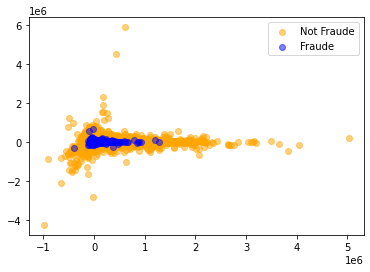

In [42]:
from sklearn.decomposition import PCA

def ACP(df, 
        column_fraude, 
        axes,#[num_axe1 , num_axe2]
        alphas #[alpha_no_fraude , alpha_fraude]
       ):
    
    quali_col = []
    for i, name in zip(df.dtypes, df.columns):
        if i == "object":
            quali_col.append(name)

    data_quanti = df.drop(columns=quali_col + ["Unnamed: 0"])

    pca = PCA()
    X_pca=pca.fit_transform(data_quanti.drop(columns=column_fraude))
    plt.scatter(X_pca[:,axes[0]][data_quanti[column_fraude]==0], X_pca[:,axes[1]][data_quanti[column_fraude]==0], alpha=alphas[0], c="orange", label="Not Fraude")
    plt.scatter(X_pca[:,axes[0]][data_quanti[column_fraude]==1], X_pca[:,axes[1]][data_quanti[column_fraude]==1], alpha=alphas[1], c="b", label="Fraude")
    plt.legend()
    plt.show()

ACP(df, "TOP_FRAUDE", [1,5],[0.5, 0.5])